# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №2

## №1 (20 баллов)

- Допустим, у нас есть подобная регрессия (допустим, что мы центрировали переменные):
$
y = \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + u
$
- Однако, наш $X_2$ абсолютно линейно зависит от $X_1$:
$
X_2 = \mu \cdot X_1
$

- Выразите через $X_1$:  
    - $
\sum{X_2^2}
$
    - $
\sum{X_2 \cdot y}
$
    - $
\sum{X_1 \cdot X_2}
$

- А теперь выразите $\beta_2$, зная формулу для нее в случае регрессии с двумя переменными, через $X_1$
$$
\beta_2 = \frac{\sum{X_1 \cdot y} \cdot \sum{X_2^2} - \sum{X_2 \cdot y} \cdot \sum{X_1 \cdot X_2}}{\sum{X_1^2} \cdot \sum{X_2^2} - (\sum{X_1 \cdot X_2})^2}
$$

- Что вы можете сказать? Что произошло с коэффициентом?

$$\sum\limits_{i=1}^k (X_2^i)^2 = X_2^{T}X_2 = \mu^2 X_1^{T}X_1 \text{, где $k$ - число наблюдений.}$$
$$\sum\limits_{i=1}^k X_2^i y_i = y^{T}X_2 = \mu y^{T}X_1$$.
$$\sum\limits_{i=1}^k X_2^i X_1^i = X_1^{T}X_2 = \mu X_1^{T}X_1$$.

Отсюда в числителе для коэффициента $\beta_2$ получаем $\mu^2 y^{T}X_1X_1^{T}X_1 - \mu^2 y^{T}X_1X_1^{T}X_1 = 0$, то есть регрессия будет иметь вид $y = \beta_1 X_1 + u$. 

### №2 (20 баллов)

- Давайте разберем такой замечательный пример из статьи [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/)
- Суть достаточно простая. Когда мы пытаемся предсказать доходности ценных бумаг (например, акций) с помощью регрессоров, которые весьма постоянны во времени (например, дивидендная доходность, которая редко меняется, т.к. компании редко сильно меняют свою дивидендную политику, чтобы не отпугнуть инвесторов), то мы получаем смещение наших оценок коэффициентов для регрессии доходности
- У нас есть:
$$
r_t = \alpha + x_{t-1} \cdot \beta + \varepsilon_t \\ 
x_t = \theta + x_{t-1} \cdot \gamma + u_t \\ 
\varepsilon_t = \phi \cdot u_t + w_t
$$
Где, $w_t$ независим от $u_t$ и $x_t$, $\gamma \in (0, 1)$
- Нам с вами надо посмотреть, что будет с $\hat{\beta}$
- Для этого надо сначала посчитать:
    - $
\hat{\gamma} 
$  
    - $
\hat{\gamma} - \gamma
$  
    - $
\hat{\beta} 
$
    - $
\hat{\beta} - \beta
$  
- Какой вывод можно сделать? Какие предпосылки вы использовали?

Не очень поняла, зачем нам $\hat{\gamma}$ и $\hat{\gamma} - \gamma$ для того, чтобы увидеть смещённость оценки коэффициента для регрессии доходности.
В статье показано, как bias в оценке $\gamma$ связан с bias'ом в $\beta$, но это какое-то более сложное утверждение, нежели смещённость $\beta$.

Какие предпосылки используются в статье: $(\epsilon_t, u_t)$ некоррелированы по $t$ (в статье берётся нормальное распределение для вычислительной простоты). 

Далее идут скучные выкладки, для которых нужно ввести много обозначений: $X_1 = (1, ..., 1)^{T},\ X_2 = (x_0, ..., x_{k-1})^{T},\ r = (r_1, ..., r_k)^{T},\ \overline X = X_2.mean() = \frac{X_1^{T}X_2}{k}, M = I_k - \frac{X_1 X_1^{T}}{k}, \epsilon = (\epsilon_1, ..., \epsilon_k)^{T}$, где $k$ - количество наблюдений, $I_k$ - единичная матрица размера $k \times k$.

Тогда (секция A.1):
$$\hat{\beta} = \frac{(X_2 - \overline X X_1)^{T}r}{(X_2 - \overline X X_1)^{T}(X_2 - \overline X X_1)}$$
$$= \frac{X_2^{T} M r}{X_2^{T} M X_2} = \beta + \frac{X_2^{T} M \epsilon}{X_2^{T} M X_2}.$$
В первом переходе очевидно $(X_2 - \overline X X_1)^{T} = X_2^{T} M$, а в знаменателе $M$, а не $M^2$, так как $M^2 = M$.
Во втором переходе мы просто расписали $r$.

Итого видим, что распределение $\hat{\beta} - \beta$, вообще говоря, не зависит от $\alpha, \beta, \theta$.
Если дальше расписывать, то в статье авторы показывают, что распределение разности зависит от $\gamma$ и от матрицы ковариации векторов $(\epsilon_t, u_t)$ (это в случае нормального распределения) + в случае, когда $\epsilon_t$ и $u_t$ коррелируют, то оценки МНК не являются несмещёнными.

## №3 (60 баллов)

- Давайте вернемся к уже известному датасету с машинами

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [2]:
df = pd.read_csv('HW_002_001.csv')

In [3]:
df.head(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


- Вы уже пытались построить всякие разные модификации линейной регресии
- Давайте же попробуем сделать опять все то же самое (можете взять ту модель, которую успели сделать на занятии)

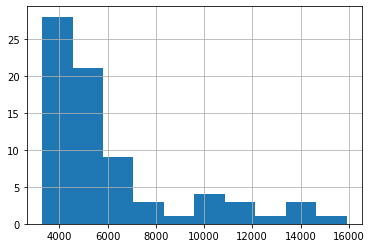

In [4]:
# Видно, что можно прологарифмировать целевую переменную
df['price'].hist();

In [5]:
new_df = df.loc[:, ['price', 'displacement', 'weight', 'foreign']]
new_df = pd.get_dummies(new_df, columns=['foreign'], prefix=['is'], drop_first=True).dropna()
new_df['price'] = np.log(new_df['price'])
new_df.head()

,price,displacement,weight,is_Foreign
0,8.318498,121,2930,0
1,8.465689,258,3350,0
2,8.242493,121,2640,0
3,8.479699,196,3250,0
4,8.965335,350,4080,0


- Расскажите немного, почему вы выбрали именно эти переменные
- Какие зависимости вы ожидали увидеть? Можете подкрепить свои гипотезы графиками
- Как зависимости в итоге увидели? Как вы считаете почему?

Для модели я выбрала переменные **displacement**, **weight** и **foreign**, потому что разумной гипотезой является то, что на цену автомобился влияют различные его характеристики: физические (объём двигателя), габаритные (вес) и производственные (импортный/местный).
И можно также предположить, что характеристики из одной группы могут сильно коррелировать между собой, поэтому были включены только по одному представителю.

У всех признаков я ожидаю положительную корреляцию с (уже прологарифмированной) целевой переменной (ниже графики), у числовых признаков, возможно, не линейную.

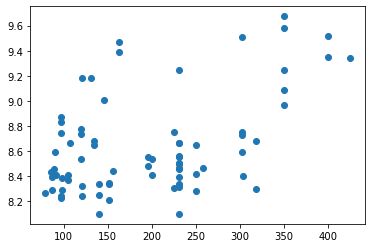

In [6]:
plt.scatter(new_df['displacement'], new_df['price']);

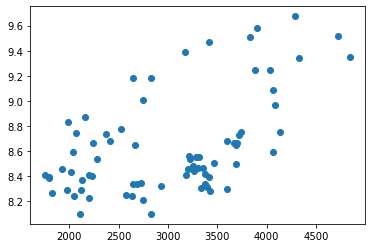

In [7]:
plt.scatter(new_df['weight'], new_df['price']);

Видим положительные зависимости, с этого и начнём.
Как вариант, можно будет попробовать поменять функциональную форму для некоторых признаков (например, для weight можно взять логарифм, даже интерпретируется неплохо).

- Теперь же давайте посмотрим на данную модель немного скептически
- Вы прошли предпосылки теоремы Г.М. и знаете о том, как тестировать на наличие нарушений этих предпосылок, как исправлять их, если возможно, и какие последствия они могут нести
- Собственно, давайте их и проверим

- Перед тем как бездумно проверять на все подряд, предположите, какие именно предпосылки могут быть нарушение
- Обоснуйте свои предпосылки. Почему вы так считаете? 
- Какие еще графики можно построить, чтобы сделать диагностику модели?
- Можно ли как-то "починить" модель, если было обнаружено нарушение предпосылки теоремы Г.М.? 
- Все ли нарушения предпосылок вы проверили? 

Во-первых, ожидаю корреляцию между признаками.
Логично предположить, что чем больше объём двигателя, тем больше вес машины.
Так же возможно, что у иностранных машин объём двигателя отличен в какую-то сторону от о.д. в стране, в которой собраны данные.

Также судя по графикам возможна гетероскедастичность.

Давайте проверять.

In [8]:
model1 = smf.ols('price ~ displacement + weight + is_Foreign', new_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     29.96
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.42e-12
Time:                        01:34:10   Log-Likelihood:                -4.6548
No. Observations:                  74   AIC:                             17.31
Df Residuals:                      70   BIC:                             26.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1930      0.182     39.619      0.000       6.831       7.555
displacement     0.0012      0.001      1.505      0.137      -0.000       0.003
weight           0.0003   9.01e-05      3.855      0.000       0.000       0.001
is_Foreign       0.5653      0.086      6.572      0.000       0.394       0.737
==============================================================================
Omnibus:                        5.425   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.251
Skew:                           0.652   Prob(JB):                       0.0724
Kurtosis:                       2.948   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
variance_inflation_factor(new_df.iloc[:, 1:], 0)

25.920858369504597

Видим подозрение на мультиколлинеарность, давайте попробуем выкинуть признак displacement (f-test счёл его незначимым + vif у него высокий).

In [10]:
model2 = smf.ols('price ~ weight + is_Foreign', new_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     43.05
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           5.70e-13
Time:                        01:34:10   Log-Likelihood:                -5.8335
No. Observations:                  74   AIC:                             17.67
Df Residuals:                      71   BIC:                             24.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0909      0.170     41.737      0.000       6.752       7.430
weight         0.0005      5e-05      9.214      0.000       0.000       0.001
is_Foreign     0.5353      0.084      6.341      0.000       0.367       0.704
==============================================================================
Omnibus:                        6.065   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.990
Skew:                           0.696   Prob(JB):                       0.0500
Kurtosis:                       2.936   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Проблему мы не решили, но интересное замечание, что коэффициенты модели не сильно изменились и ведут себя довольно стабильно.
Давайте вернёмся к изначальным признакам и проверим модель на выполнимость остальных предпосылок теоремы Г-М. 
Такое решение было принятно исходя из того, что мультиколлинеарность не всегда портит оценки, и, как мы увидели, удаление незначимого признака не привело ни к чему.

Давайте проверим на гетероскедастичность с помощью white теста.

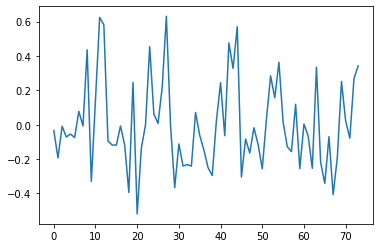

In [11]:
model1.resid.plot();

In [12]:
sm.stats.diagnostic.het_white(model1.resid, sm.add_constant(new_df.iloc[:, 1:]))

(8.86577304993102, 0.35374551607039684, 1.105937836429841, 0.3709788537311089)

Видим, что тест не отверг гипотезу о гомоскедастичности, поэтому будем считать, что это условие Г-М выполнено.

Посчитаем среднее ошибок.

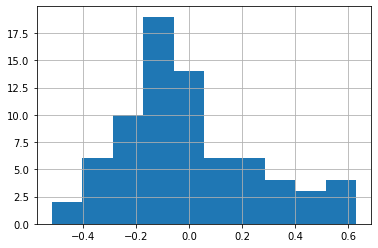

In [13]:
model1.resid.hist();

In [14]:
np.mean(model1.resid)

5.2078461663227615e-14

Видим, что среднее около нуля (значений достаточно, чтобы ЗБЧ работал, поэтому среднее является хорошей оценкой для матожа в данном случае).

Также нет обоснований считать объясняющие переменные эндогенными, так как вряд ли какая-то из них скореллирована с ошибкой. 
Точности же измерений поверим, так как скорее всего это характеристики, за которые отвечает производитель.

Итак, проверили все предпосылки Г-М, модель не удовлетворяет только мультиколлинеарности, но в остальном имеет за собой хорошую бизнес-логику.
Перед тем, как удовлетворится результатам, давайте поэкспериментируем с функциональной формой модели (график ошибок мне не очень понравился, хотя тест Уайта не показал наличие гетероскедастичности), по следующим графикам у меня лично возникает желание взять логарифм от **displacement** и **weight**.

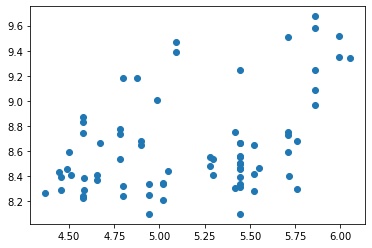

In [15]:
plt.scatter(np.log(new_df['displacement']), new_df['price']);

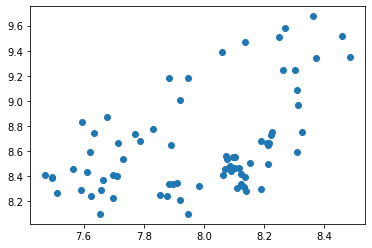

In [16]:
plt.scatter(np.log(new_df['weight']), new_df['price']);

In [17]:
model3 = smf.ols('price ~ np.log(displacement) + np.log(weight) + is_Foreign', new_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     23.52
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.23e-10
Time:                        01:34:11   Log-Likelihood:                -9.4241
No. Observations:                  74   AIC:                             26.85
Df Residuals:                      70   BIC:                             36.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4920      1.654     -0.298      0.767      -3.790       2.806
np.log(displacement)     0.2147      0.177      1.213      0.229      -0.138       0.568
np.log(weight)           0.9842      0.295      3.339      0.001       0.396       1.572
is_Foreign               0.5680      0.097      5.866      0.000       0.375       0.761
==============================================================================
Omnibus:                        6.459   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.496
Skew:                           0.724   Prob(JB):                       0.0389
Kurtosis:                       2.903   Cond. No.                         490.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

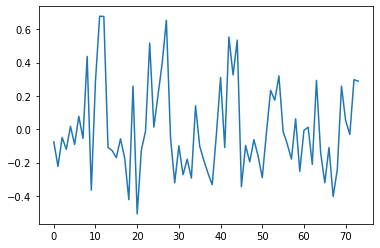

In [18]:
model3.resid.plot();

Хоть и избавляемся от мультиколлинеарности, но признаки становятся незначимыми + график ошибок не изменился визуально.
Так что кажется изменение функциональной формы не принесло пользы.

- Улучшилась ли ваша моделька?
- Как вы считаете, всегда надо "добивать" нарушения предпосылок теорему Г.М.? 
- Что бы вы предпочли, логичную с точки зрения здравого смысла и бизнес сенса модель, но с какими-то нарушениями теоремы Г.М. или же модель, в которой нет нарушений, но при этом совершенно непонятно, почему те или иные переменные в ней оказались? А возможен ли вообще второй случай по вашему мнению?

Изначальная моделька оказалась неплоха, но не удовлетворяет всем условиям Г-М.
При этом модель хорошо интерпретируется и охватывает различные характеристики автомобиля.

Если смотреть в общем, то всё-таки хотелось бы, чтобы модель удовлетворяла условиям Г-М, но это почти всегда невозможно хотя бы из соображений эндогенности или наличия гетероскедастичности (вряд ли всегда можно удачно подобрать функциональную форму или ещё как-то исхитриться, чтобы её побороть).
Поэтому реалистичный сценарий - соблюдать по максимуму условия теоремы, но и опираться на здравый смысл. 
В примере выше у модели были коэффициенты, за которыми (на мой взгляд) имеется логика, хотя мультиколлинеарность мы не побороли.

Ответ на вопрос "возможен ли вариант с неинтерпретируемой моделью, которая удовлетворяет всем условиям теоремы": на мой взгляд да, опять же можно, глядя на данные, подобрать идеальную функциональную форму, которая отлично аппроксимирует выборку, но не несёт за собой особого смысла.